In [189]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib as mpl
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import os

In [190]:
url = "https://understat.com/team/Arsenal/2022"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

In [191]:
MatchesPlayed = [json_data[i]["id"] for i in range(len(json_data)) if json_data[i]["isResult"] == True]

In [192]:
MatchesPlayed

['18202', '18217', '18227', '18238', '18247']

EPL - Crystal Palace VS Arsenal (5 August 2022) (A) : https://understat.com/match/18202
EPL - Arsenal VS Leicester (13 August 2022) (A) : https://understat.com/match/18217
EPL - Bournemouth VS Arsenal (20 August 2022) (A) : https://understat.com/match/18227
EPL - Arsenal VS Fulham (27 August 2022) (A) : https://understat.com/match/18238
EPL - Arsenal VS Aston Villa (31 August 2022) (A) : https://understat.com/match/18247


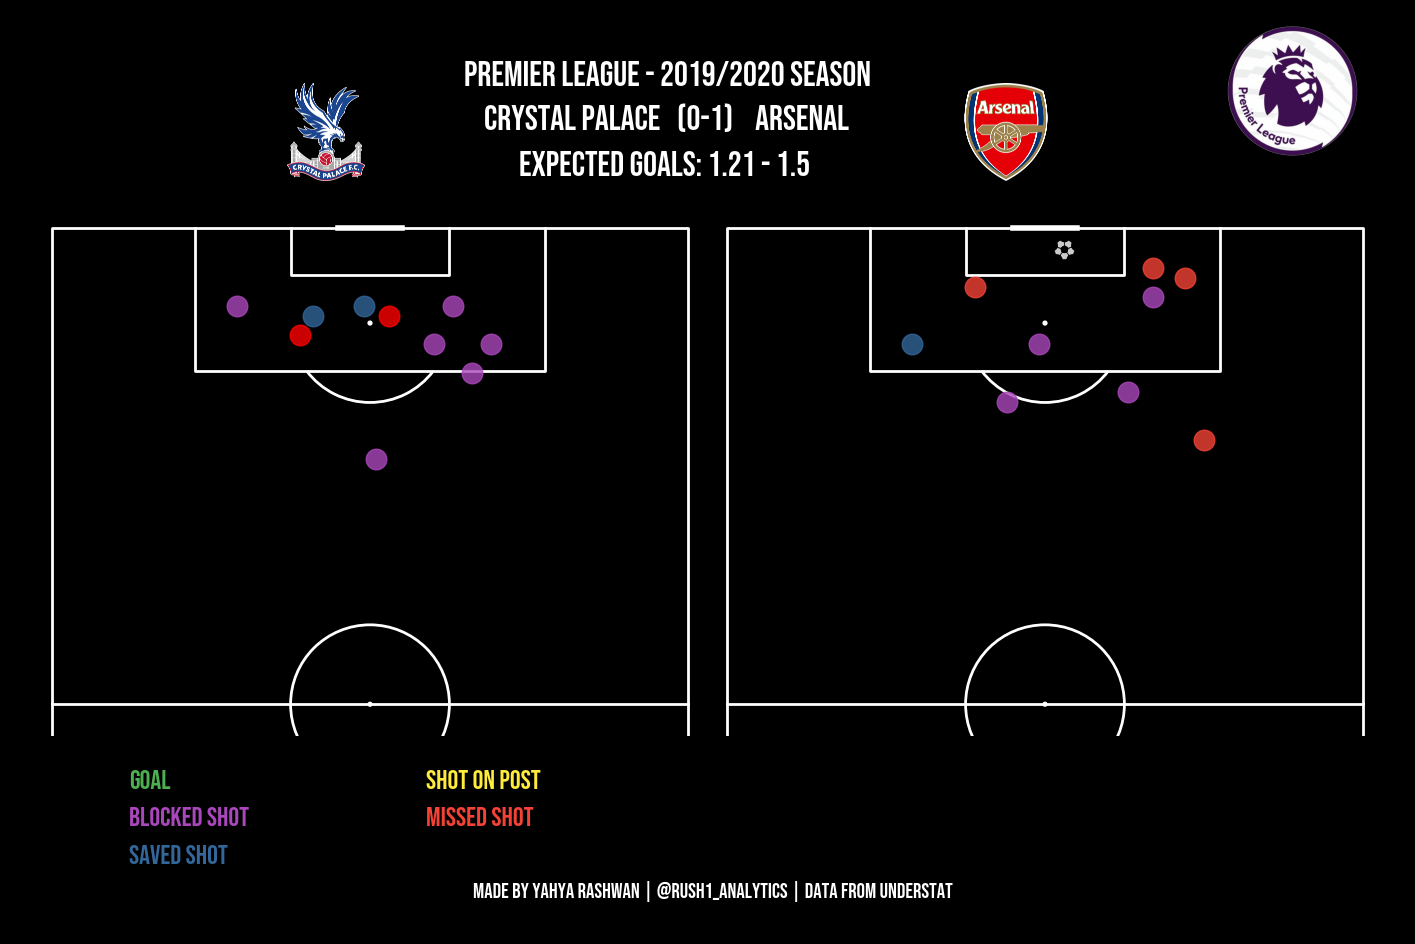

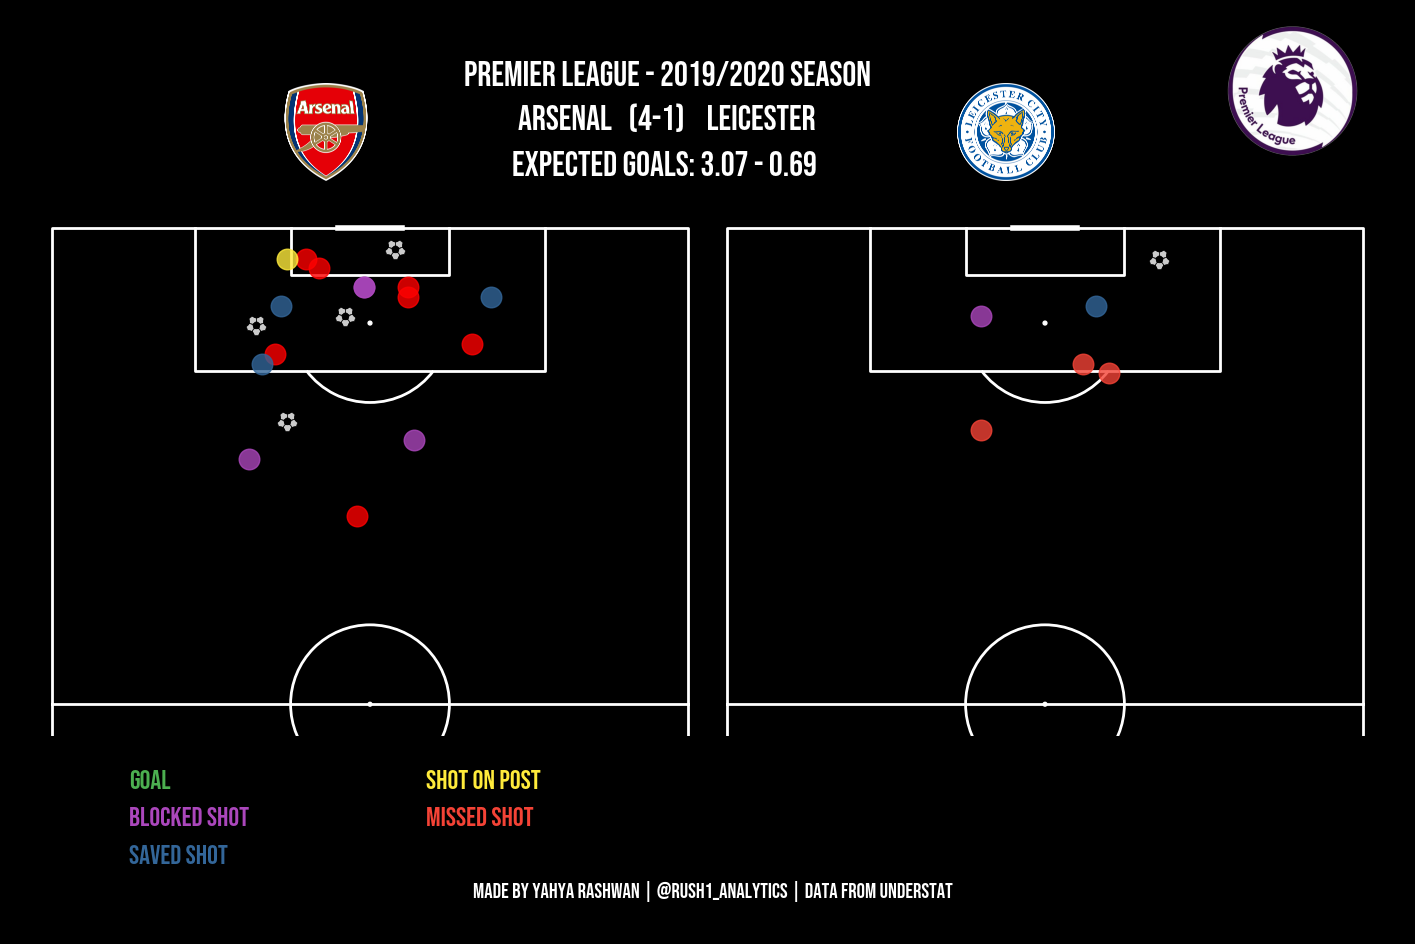

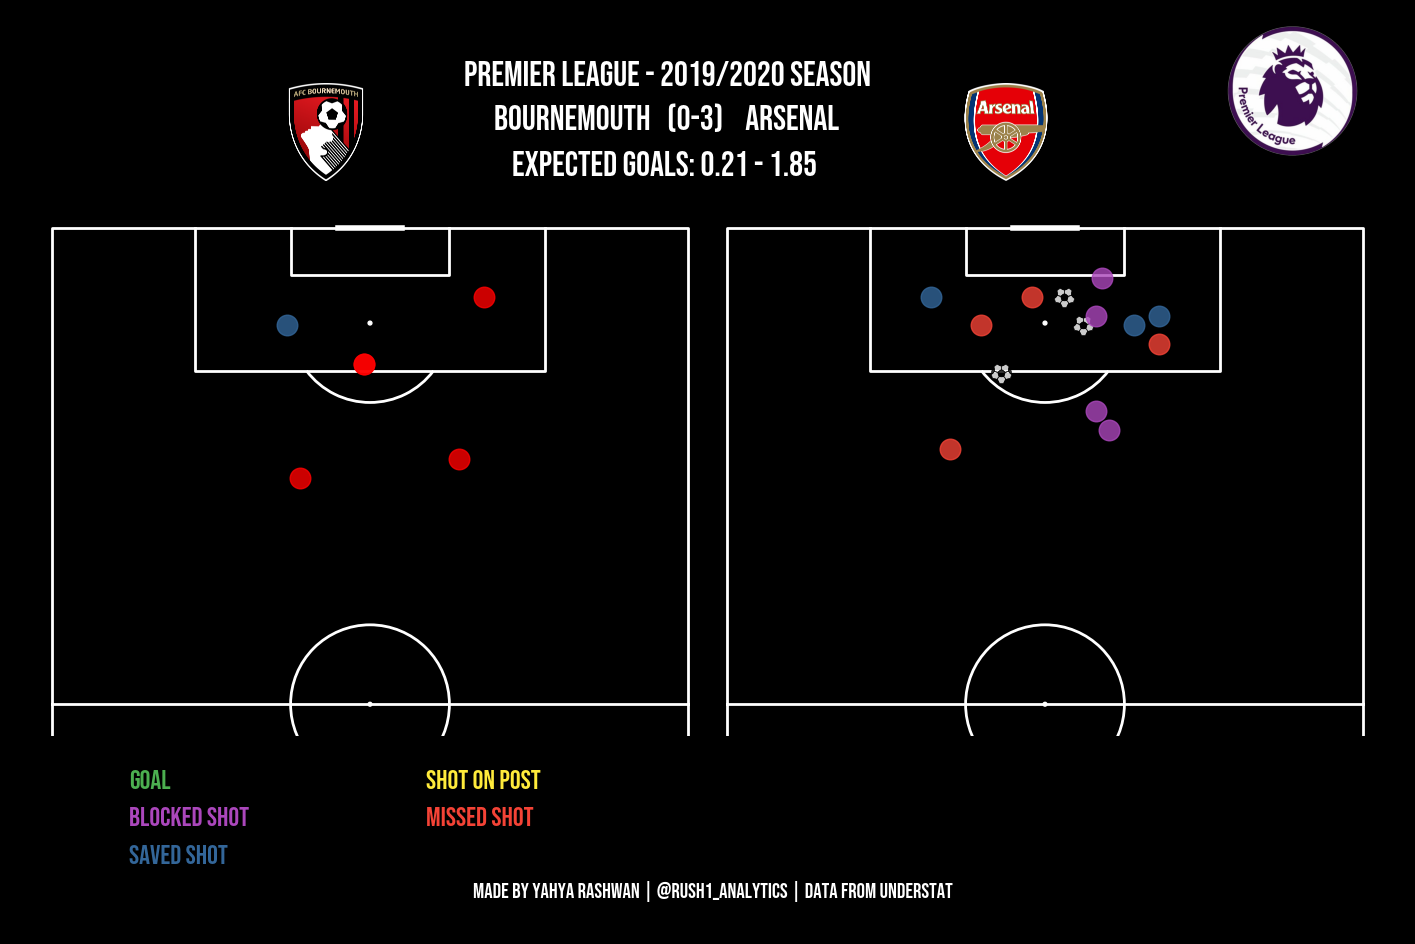

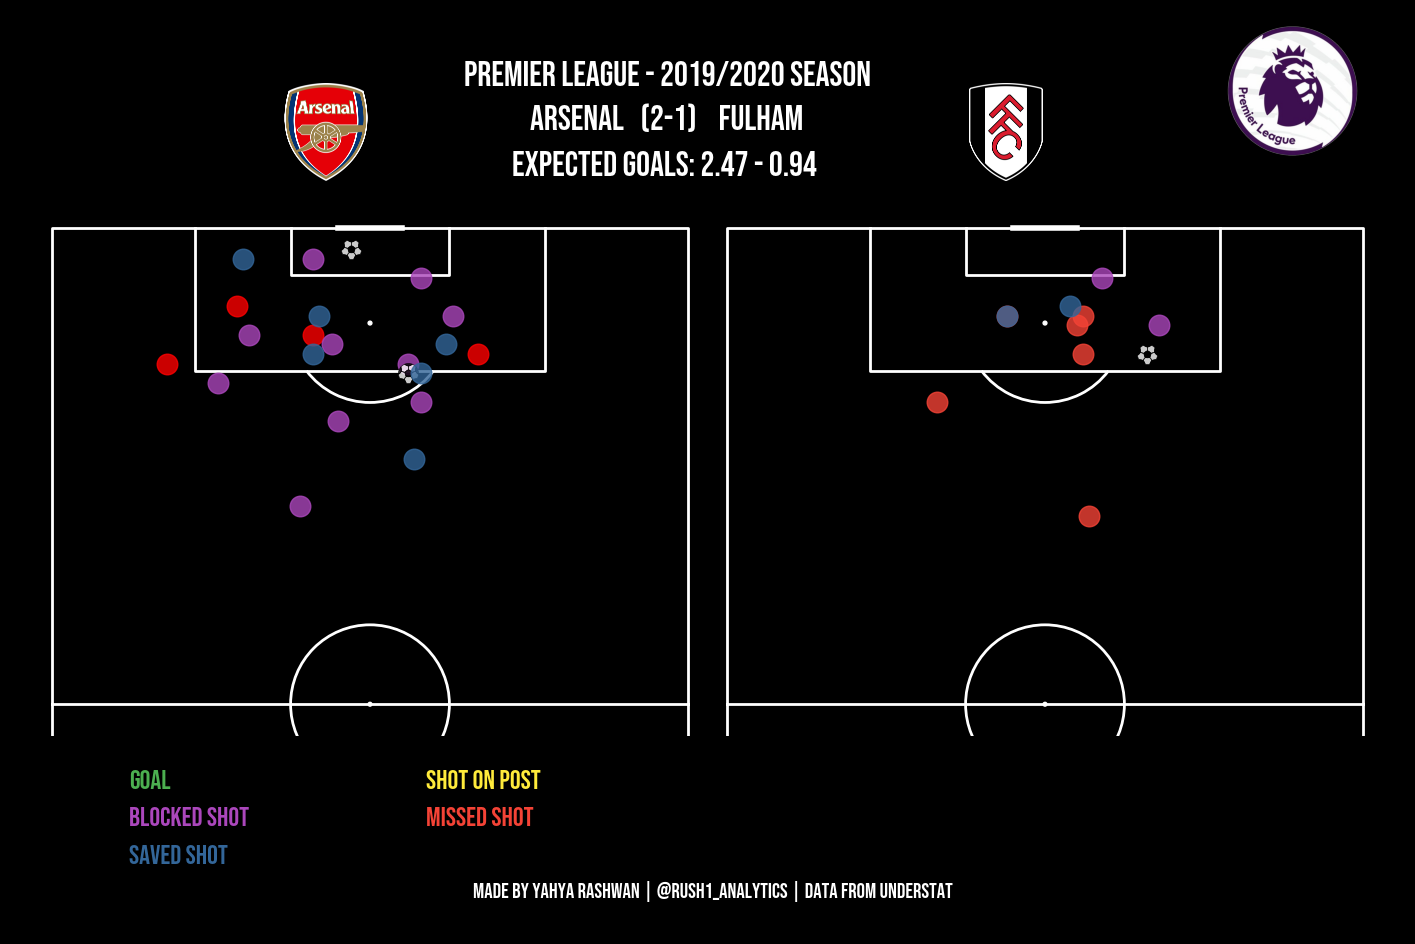

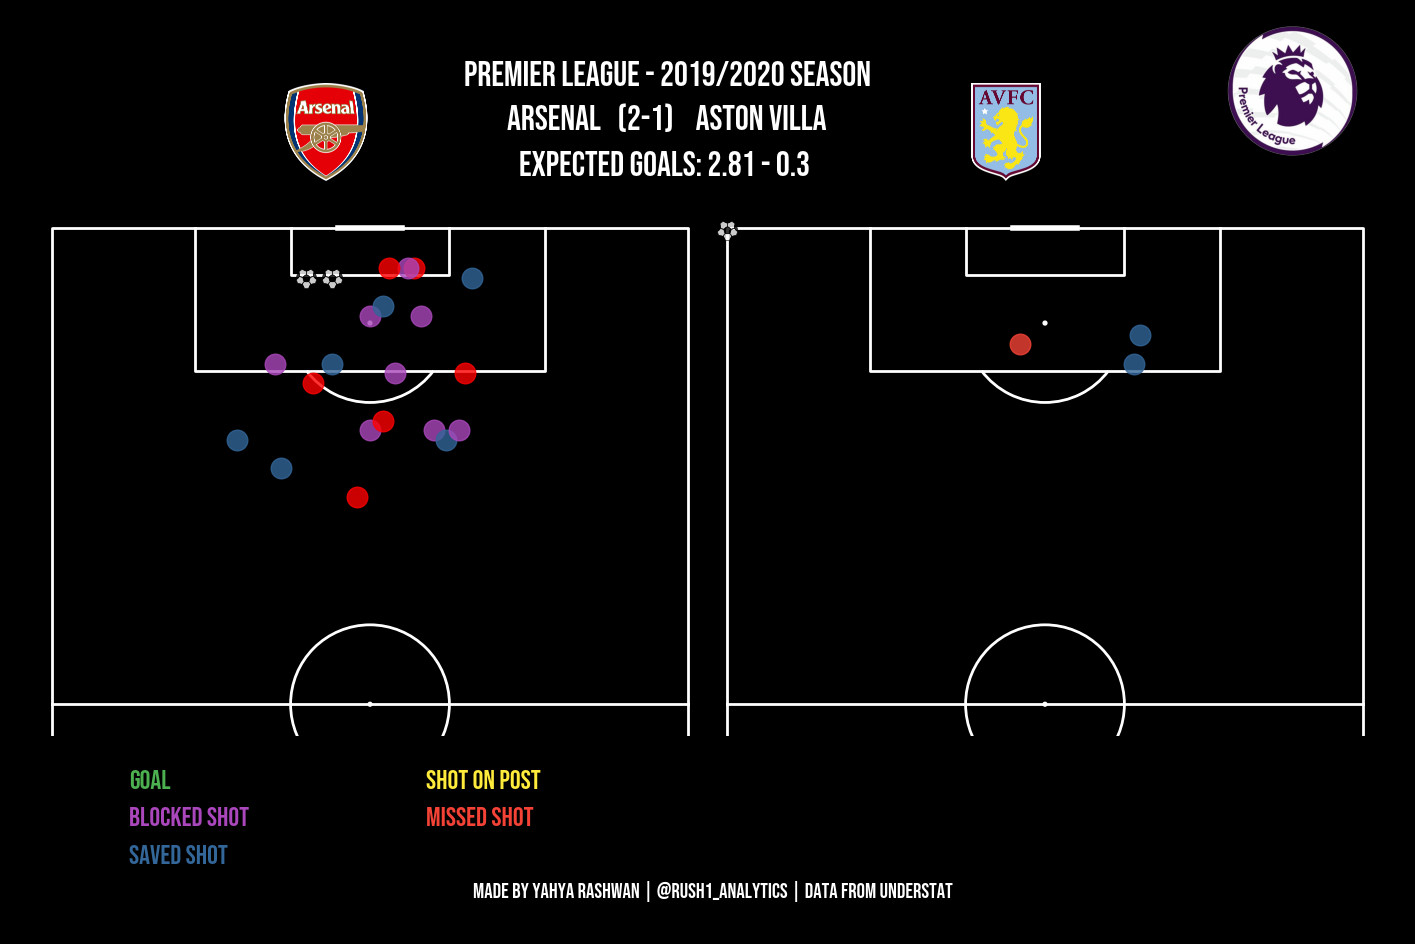

In [193]:
summary = pd.DataFrame()

for i in MatchesPlayed:
    url = f"https://understat.com/match/{i}"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[1].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)
    title = soup.find_all('a')
    title = title[5].text
    HomeTeam = json_data["h"][0]["h_team"]
    AwayTeam = json_data["h"][0]["a_team"]
    date = pd.to_datetime(json_data['h'][0]['date'])
    date = f"{date.day} {date.month_name()} {date.year}"
    if HomeTeam == "Everton":
        print(f"{title} - {HomeTeam} VS {AwayTeam} ({date}) (H) : {url}")
    else:
        print(f"{title} - {HomeTeam} VS {AwayTeam} ({date}) (A) : {url}")
    
    h_minutes = [json_data['h'][i]['minute'] for i in range(len(json_data['h']))]
    h_X = [json_data['h'][i]['X'] for i in range(len(json_data['h']))]
    h_Y = [json_data['h'][i]['Y'] for i in range(len(json_data['h']))]
    h_xG = [json_data['h'][i]['xG'] for i in range(len(json_data['h']))]
    h_player_name = [json_data['h'][i]['player'] for i in range(len(json_data['h']))]
    h_assisted_by = [json_data['h'][i]['player_assisted'] for i in range(len(json_data['h']))]
    h_player_id = [json_data['h'][i]['player_id'] for i in range(len(json_data['h']))]
    h_player_team = [json_data['h'][i]['h_team'] for i in range(len(json_data['h']))]
    h_situation = [json_data['h'][i]['situation'] for i in range(len(json_data['h']))]
    h_result = [json_data['h'][i]['result'] for i in range(len(json_data['h']))]
    h_last_action = [json_data['h'][i]['lastAction'] for i in range(len(json_data['h']))]


    df_home = pd.DataFrame({'Minute':h_minutes,'X':h_X,'Y':h_Y,'xG':h_xG,'Player':h_player_name,'player_id':h_player_id,'Assist':h_assisted_by,'Home Team':h_player_team,'Situation':h_situation,"Last action":h_last_action,'Output':h_result})

    df_home['Minute'] = df_home['Minute'].astype(int)
    df_home['X'] = df_home['X'].astype(float).round(2)
    df_home['Y'] = df_home['Y'].astype(float).round(2)
    df_home['xG'] = df_home['xG'].astype(float).round(2)
    df_home['Minute'] = df_home['Minute'].astype(int)

    df_home.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost','OwnGoal'],
                        ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post','Own Goal'],inplace=True)
    df_home['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                                ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

    df_home['Last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                                ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

    for i in range(len(df_home)):
        df_home['X'][i] = df_home['X'][i]*120 - 0.3
        df_home['Y'][i] = abs(df_home['Y'][i]*80 - 80)

    home_team = df_home['Home Team'].unique()[0]
    home_score = df_home[df_home['Output'] == 'Goal'].shape[0]
    home_score_xg = df_home['xG'].sum()
    home_score_xg = round(home_score_xg,2)

    a_minutes = [json_data['a'][i]['minute'] for i in range(len(json_data['a']))]
    a_X = [json_data['a'][i]['X'] for i in range(len(json_data['a']))]
    a_Y = [json_data['a'][i]['Y'] for i in range(len(json_data['a']))]
    a_xG = [json_data['a'][i]['xG'] for i in range(len(json_data['a']))]
    a_player_name = [json_data['a'][i]['player'] for i in range(len(json_data['a']))]
    a_assisted_by = [json_data['a'][i]['player_assisted'] for i in range(len(json_data['a']))]
    a_player_id = [json_data['a'][i]['player_id'] for i in range(len(json_data['a']))]
    a_player_team = [json_data['a'][i]['a_team'] for i in range(len(json_data['a']))]
    a_situation = [json_data['a'][i]['situation'] for i in range(len(json_data['a']))]
    a_result = [json_data['a'][i]['result'] for i in range(len(json_data['a']))]
    a_last_action = [json_data['a'][i]['lastAction'] for i in range(len(json_data['a']))]


    df_away = pd.DataFrame({'Minute':a_minutes,'X':a_X,'Y':a_Y,'xG':a_xG,'Player':a_player_name,'Assist':a_assisted_by,'player_id':a_player_id,'Away Team':a_player_team,'Situation':a_situation,'Last action':a_last_action,'Output':a_result})

    df_away['Minute'] = df_away['Minute'].astype(int)
    df_away['X'] = df_away['X'].astype(float).round(2)
    df_away['Y'] = df_away['Y'].astype(float).round(2)
    df_away['xG'] = df_away['xG'].astype(float).round(2)
    df_away['Minute'] = df_away['Minute'].astype(int)

    for i in range(len(df_away)):
        df_away['X'][i] = df_away['X'][i]*120 - 0.3
        df_away['Y'][i] = abs(df_away['Y'][i]*80-80)

    df_away.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost','OwnGoal'],
                        ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post',"Own Goal"],inplace=True)
    df_away['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'], 
                                ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

    df_away['Last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                                ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)
        

    """""df['Shot type'].replace(['LeftFoot', 'RightFoot','OtherBodyPart'],
                                ['Left Foot','Right Foot' ,'Other Body Part'] ,inplace=True)"""""


    away_team = df_away['Away Team'].unique()[0]
    away_score = df_away[df_away['Output'] == 'Goal'].shape[0]
    away_score_xg = df_away['xG'].sum()
    away_score_xg = round(away_score_xg,2)


    if "OwnGoal" in df_away.Output.values:
        home_score += 1
        
        if "OwnGoal" in df_home.Output.values:
            away_score += 1

    Leagues = {'Ligue 1':"Ligue 1 uber eats",
        'EPL':"Premier League",
        'Serie A':"Serie A TIM",
        'La liga':"LaLiga Santander",
        'Bundesliga':"Bundesliga"}

    Leagues_logos = {'Ligue 1':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Logo_Ligue_1_Uber_Eats_2020.svg.png",
        'EPL':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Premier-League-PNG-Image.png",
        'Serie A':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\se1113l151-serie-a-logo-lega-serie-a-european-leagues.png",
        'La liga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\6893566_preview.png",
        'Bundesliga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\bundesliga-home-events.png"}

    if title in Leagues_logos.keys():
            league = Leagues[title]
            league_logo = Leagues_logos[title]
            #print(league,": ",league_logo)

    for root,dirs,files in os.walk(r"C:\Users\Administrator\Desktop\DataVizMaterial\club badges"):
        for file in files:
            try:
                if file.startswith(f'{home_team}'):
                    #print(os.path.join(root,file))
                    HomeTeamLogo_ = os.path.join(root,file)
                
                if file.startswith(f'{away_team}'):
                    #print(os.path.join(root,file))
                    AwayTeamLogo_ = os.path.join(root,file)
            
            except:
                print('Photo not found')
                break    


    if away_team != "Arsenal" :
        summary = pd.concat([summary,df_away],axis=0)
    elif home_team != " Arsenal":
            summary = pd.concat([summary,df_home],axis=0)
    background = 'black'
    text_color = 'white'

    plt.style.use('dark_background')

    mpl.rcParams['xtick.color']=text_color
    mpl.rcParams['ytick.color']=text_color
    mpl.rcParams['axes.labelcolor']='black'
    mpl.rcParams['text.color']=text_color
    mpl.rcParams['legend.fontsize'] = 15

    path = r"D:\Downloads\Downloads\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
    fontprop = fm.FontProperties(fname=path, size=60, weight='bold', style='normal', stretch='normal')
    fontprop2 = fm.FontProperties(fname=path, size=12.5*2, weight='bold', style='normal', stretch='normal')
    fontprop3 = fm.FontProperties(fname=path, size=6.5*3, weight='bold', style='normal', stretch='normal')

    pitch = VerticalPitch( half=True,goal_type='line',line_color='white')
    fig, ax = plt.subplots(figsize=(6*3,4*3))
    ax.axis('off')

    HomeShots = fig.add_axes((0.10, 0.275, 0.45, 0.45))
    HomeShots.patch.set_facecolor('black')
    HomeShots.axis('off')
    pitch.draw(ax=HomeShots)

    AwayShots = fig.add_axes((0.475, 0.275, 0.45, 0.45))
    AwayShots.patch.set_facecolor(background)
    pitch.draw(ax=AwayShots)
    AwayShots.axis('off')

    for i in range(len(df_home)):
            if df_home.Output[i] == 'Goal':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="white",s=220,alpha=0.8,marker='football',edgecolors='black')
            elif df_home.Output[i] == 'Blocked Shot':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#AB47BC",s=220,alpha=0.8,marker='o',edgecolors='#AB47BC')
            elif df_home.Output[i] == 'Saved Shot':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#336699",s=220,alpha=0.8,marker='o',edgecolors='#336699')
            elif df_home.Output[i] == 'Shot On Post':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#FFEB3B",s=220,alpha=0.8,marker='o',edgecolors='#FFEB3B')
            elif df_home.Output[i] == 'Missed Shot':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="red",s=220,alpha=0.8,marker='o',edgecolors='red')
            else:
                pitch.scatter(ax=AwayShots,x=df_home['X'][i],y=df_home['Y'][i],c="red",s=220,alpha=0.8,marker='*',edgecolors='black')

    for i in range(len(df_away)):
            if df_away.Output[i] == 'Goal':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="white",s=220,alpha=0.8,marker='football',edgecolors='black')   
            elif df_away.Output[i] == 'Blocked Shot':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#AB47BC",s=220,alpha=0.8,marker='o',edgecolors='#AB47BC')
            elif df_away.Output[i] == 'Saved Shot':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#336699",s=220,alpha=0.8,marker='o',edgecolors='#336699')
            elif df_away.Output[i] == 'Shot On Post':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#FFEB3B",s=220,alpha=0.8,marker='o',edgecolors='#FFEB3B')
            elif df_away.Output[i] == 'Missed Shot':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#F44336",s=220,alpha=0.8,marker='o',edgecolors='#F44336')
            else:
                pitch.scatter(ax=HomeShots,x=df_away['X'][i],y=df_away['Y'][i],c="red",s=220,alpha=0.8,marker='*',edgecolors='black')

    HomeLogo = fig.add_axes((0.26, 0.7375,0.125*0.65,0.125*0.65))
    HomeLogo.patch.set_facecolor(background)
    HomeLogo.axis('off')

    im = plt.imread(HomeTeamLogo_)
    HomeLogo.imshow(im)


    AwayLogo = fig.add_axes((0.6375, 0.7375,0.125*0.65,0.125*0.65))
    AwayLogo.patch.set_facecolor(background)
    AwayLogo.axis('off')

    im = plt.imread(AwayTeamLogo_)
    AwayLogo.imshow(im)

    LeagueLogo = fig.add_axes((0.775, 0.75,0.125,0.125))
    LeagueLogo.patch.set_facecolor(background)
    LeagueLogo.axis('off')
    im = plt.imread(league_logo)
    LeagueLogo.imshow(im)

    MatchInfo = fig.add_axes((0.365, 0.7275,0.125*2,0.125))
    MatchInfo.patch.set_facecolor(background)
    MatchInfo.axis('off')
    MatchInfo.text(0.5, 0.8, f'{league} - 2019/2020 Season',ha='center', va='center', color=text_color,fontproperties=fontprop2)
    MatchInfo.text(0.5, 0.5, f'{home_team}   ({home_score}-{away_score})    {away_team}',ha='center', va='center', color=text_color,fontproperties=fontprop2)
    MatchInfo.text(0.5, 0.2, f'Expected Goals: {home_score_xg} - {away_score_xg} ',ha='center', va='center', color=text_color,fontproperties=fontprop2)

    ax_opta10 = fig.add_axes((0.5125, 0.1875,0.125*3,0.125/2))
    ax_opta10.patch.set_facecolor(background)
    ax_opta10.axis('off')

    """ax_opta10.scatter(0.78,0.5,c="#4CAF50",s=1*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
    ax_opta10.scatter(0.77,0.5,c="#4CAF50",s=0.75*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
    ax_opta10.scatter(0.76,0.5,c="#4CAF50",s=0.5*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
    ax_opta10.scatter(0.75,0.5,c="#4CAF50",s=0.25*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')"""

    MatchLegend = fig.add_axes((0.15 , 0.1875- 0.125/2,0.125*2.75,0.125))
    MatchLegend.patch.set_facecolor(background)
    MatchLegend.axis('off')

    MatchLegend.text(0.12,0.85, 'Goal', fontproperties= fontprop3, color='#4CAF50')
    MatchLegend.text(0.12,0.6, 'Blocked Shot', fontproperties= fontprop3, color="#AB47BC")
    MatchLegend.text(0.12,0.35, 'Saved Shot', fontproperties= fontprop3, color="#336699")
    MatchLegend.text(0.12*5,0.85, 'Shot On Post', fontproperties= fontprop3, color='#FFEB3B')
    MatchLegend.text(0.12*5,0.6, 'Missed Shot', fontproperties= fontprop3, color='#F44336')
    MatchLegend.text(0.675, 0.1205, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontsize = 15,fontproperties=fontprop3)

    plt.savefig(rf"C:\Users\Administrator\Desktop\trials - Copy\{home_team} vs {away_team} - {league}.png",dpi=300,bbox_inches='tight',facecolor="#393b3d")


In [194]:
summary.reset_index(inplace=True,drop=True)

In [195]:
summary

,Minute,X,Y,xG,Player,player_id,Assist,Home Team,Situation,Last action,Output,Away Team
0,41,110.1,39.2,0.39,Odsonne Edouard,3697,Joachim Andersen,Crystal Palace,Set Piece,Head Pass,Saved Shot,NaN
1,45,101.7,52.8,0.06,Odsonne Edouard,3697,Jordan Ayew,Crystal Palace,Open Play,Pass,Blocked Shot,NaN
2,45,110.1,50.4,0.07,Odsonne Edouard,3697,None,Crystal Palace,Open Play,Rebound,Blocked Shot,NaN
3,46,90.9,40.8,0.03,Jeffrey Schlupp,757,Jordan Ayew,Crystal Palace,Open Play,Pass,Blocked Shot,NaN
4,51,108.9,32.8,0.38,Eberechi Eze,8706,Wilfried Zaha,Crystal Palace,Open Play,Through ball,Saved Shot,NaN
5,65,105.3,55.2,0.04,Jeffrey Schlupp,757,None,Crystal Palace,Open Play,None,Blocked Shot,NaN
6,71,110.1,23.2,0.03,Wilfried Zaha,522,Jordan Ayew,Crystal Palace,Open Play,Cross,Blocked Shot,NaN
7,80,105.3,48.0,0.06,Jordan Ayew,672,Nathaniel Clyne,Crystal Palace,Open Play,Take On,Blocked Shot,NaN
8,80,106.5,31.2,0.06,Jean-Philippe Mateta,5735,Wilfried Zaha,Crystal Palace,Open Play,Goal,Missed Shot,NaN
9,80,108.9,42.4,0.09,Jeffrey Schlupp,757,Jean-Philippe Mateta,Crystal Palace,Open Play,None,Missed Shot,NaN


In [196]:
summary[summary.Output=='Goal']

,Minute,X,Y,xG,Player,player_id,Assist,Home Team,Situation,Last action,Output,Away Team
14,73,116.1,54.4,0.06,James Maddison,6818,Kelechi Iheanacho,NaN,Open Play,Pass,Goal,Leicester
29,55,104.1,52.8,0.31,Aleksandar Mitrovic,773,None,NaN,Open Play,Ball Recovery,Goal,Fulham
37,73,119.7,0.0,0.01,Douglas Luiz,6122,None,NaN,From Corner,CornerAwarded,Goal,Aston Villa


In [197]:
Shots = len(summary)
SavedShots = len(summary[summary.Output=='Saved Shot'])
Goals = len(summary[summary.Output=='Goal'])
ShotsOnTarget = len(summary[(summary.Output !='Blocked Shot') & (summary.Output != 'Missed Shot') & (summary.Output != 'Own Goal')])

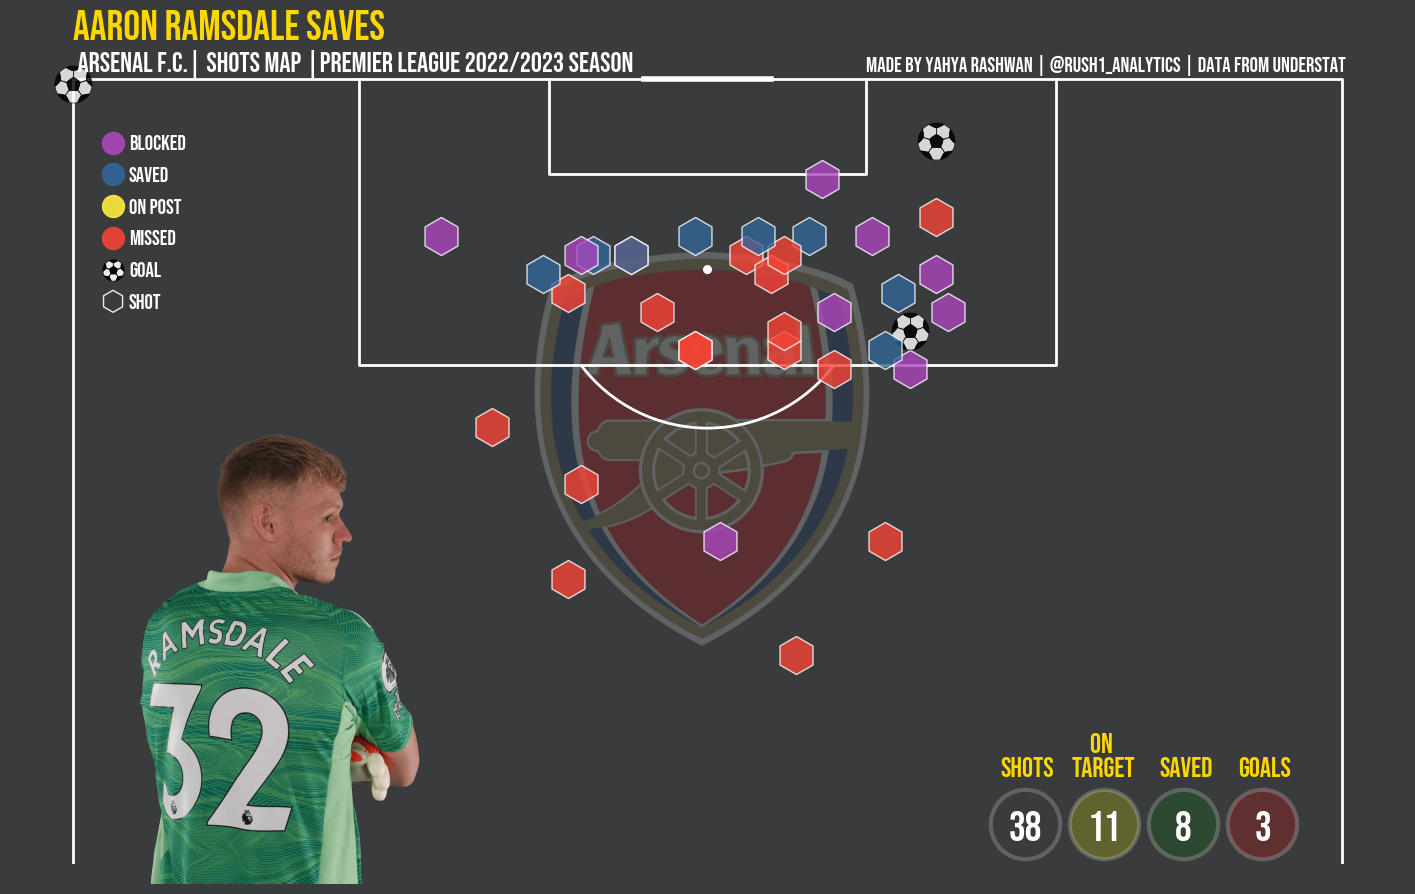

In [198]:
background = '#393b3d'
text_color = 'white'

mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['axes.labelcolor']='black'
mpl.rcParams['text.color']=text_color
mpl.rcParams['legend.fontsize'] = 15


path = r"D:\Downloads\Downloads\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
fontprop = fm.FontProperties(fname=path, size=30, weight='bold', style='normal', stretch='normal')
fontprop2 = fm.FontProperties(fname=path, size=10*2, weight='bold', style='normal', stretch='normal')
fontprop3 = fm.FontProperties(fname=path, size=5*3, weight='bold', style='normal', stretch='normal')

pitch = VerticalPitch( half=True,goal_type='line',line_color='white',pad_bottom=-10.5,linewidth=2)
fig, ax = plt.subplots(figsize=(6*3,4*3))
ax.axis('off')

fig.patch.set_color(background)
pitch.draw(ax=ax)

for i in range(len(summary)):
    if summary.Output[i] == 'Goal':
        pitch.scatter(ax=ax,x=summary['X'][i],y=summary['Y'][i],c="white",s=750,alpha=0.8,marker='football',edgecolors='black')
    elif summary.Output[i] == 'Blocked Shot':
        pitch.scatter(ax=ax,x=summary['X'][i],y=summary['Y'][i],c="#AB47BC",s=750,alpha=0.8,marker='h',edgecolors='white')
    elif summary.Output[i] == 'Saved Shot':
        pitch.scatter(ax=ax,x=summary['X'][i],y=summary['Y'][i],c="#336699",s=750,alpha=0.8,marker='h',edgecolors='white')
    elif summary.Output[i] == 'Shot On Post':
        pitch.scatter(ax=ax,x=summary['X'][i],y=summary['Y'][i],c="#FFEB3B",s=750,alpha=0.8,marker='h',edgecolors='white')
    else:
        pitch.scatter(ax=ax,x=summary['X'][i],y=summary['Y'][i],c="#F44336",s=750,alpha=0.8,marker='h',edgecolors='white')

#############################################################################################################################################

"""pitch.scatter(ax=ax,x=117,y=2.5,s=250,c='#4CAF50',alpha=0.9,marker='o',edgecolors='#4CAF50')
ax.text(3.5, 116.55, 'Assist', fontproperties= fontprop3)"""

pitch.scatter(ax=ax,x=116,y=2.5,s=250,c='#AB47BC',alpha=0.9,marker='o',edgecolors='#AB47BC')
ax.text(3.5, 115.55, 'Blocked', fontproperties= fontprop3)

pitch.scatter(ax=ax,x=114,y=2.5,s=250,c='#336699',alpha=0.9,marker='o',edgecolors='#336699')
ax.text(3.5, 113.55, 'Saved', fontproperties= fontprop3)

pitch.scatter(ax=ax,x=112,y=2.5,s=250,c='#FFEB3B',alpha=0.9,marker='o',edgecolors='#FFEB3B')
ax.text(3.5, 111.55, 'on post', fontproperties= fontprop3)

pitch.scatter(ax=ax,x=110,y=2.5,s=250,c='#F44336',alpha=0.9,marker='o',edgecolors='#F44336')
ax.text(3.5, 109.55, 'Missed', fontproperties= fontprop3)

pitch.scatter(ax=ax,x=108,y=2.5,s=250,c='white',alpha=0.9,marker='football',edgecolors='black')
ax.text(3.5, 107.55, 'Goal', fontproperties= fontprop3)

pitch.scatter(ax=ax,x=106,y=2.5,s=250,c='none',alpha=0.9,marker='h',edgecolors='white')
ax.text(3.5, 105.55, 'Shot', fontproperties= fontprop3)


#############################################################################################################################################

ax.text(0.0045, 122.5,"aaron ramsdale saves" ,c='#FFD700', fontproperties=fontprop)
ax.text(0.0047, 120.5, f' Arsenal f.c.| Shots map |{league} 2022/2023 season', fontproperties= fontprop2)

ax.text(50, 120.5, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontproperties= fontprop3)


ax_opta8 = fig.add_axes((0.175, 0.125,0.175*1.25,0.3*1.25))
ax_opta8.patch.set_facecolor(background)
ax_opta8.axis('off')
############################################################################################################################################
pitch.scatter(ax=ax,x=73,y=60,c="#393b3d",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
pitch.scatter(ax=ax,x=73,y=65,c="yellow",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
pitch.scatter(ax=ax,x=73,y=70,c="green",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
pitch.scatter(ax=ax,x=73,y=75,c="red",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)

ax.text(73.5, 76,"Goals" ,c='#FFD700', fontproperties=fontprop2)
ax.text(73.5-5, 76,"Saved" ,c='#FFD700', fontproperties=fontprop2)
ax.text(73.5-10.5, 76,"    On\nTarget" ,c='#FFD700', fontproperties=fontprop2)
ax.text(73.5-15, 76,"Shots" ,c='#FFD700', fontproperties=fontprop2)

if Shots < 10 or SavedShots < 10 or ShotsOnTarget < 10:
        ax.text(74.5, 72, f"{Goals}" ,  fontproperties=fontprop,c='white')
        ax.text(74.5-5, 72,f"{SavedShots}" , fontproperties=fontprop,c='white')
        ax.text(74.5-10.5, 72,f"{ShotsOnTarget}" , fontproperties=fontprop,c='white')
        ax.text(74.5-15.5, 72,f"{Shots}" , fontproperties=fontprop,c = 'white')
else:
        ax.text(74.5, 72, f"{Goals}" ,  fontproperties=fontprop,c='white')
        ax.text(74.5-5.5, 72,f"{SavedShots}" , fontproperties=fontprop,c='white')
        ax.text(74.5-10.5, 72,f"{ShotsOnTarget}" , fontproperties=fontprop,c='white')
        ax.text(74.5-15.5, 72,f"{Shots}" , fontproperties=fontprop,c = 'white')

PlotGK = fig.add_axes((0.165, 0.125,0.175*1.25,0.3*1.25))
PlotGK.patch.set_facecolor(background)
PlotGK.axis('off')
im = plt.imread(r"D:\Downloads\Downloads\Aaron Ramsdale - FootyRenders.png")
PlotGK.imshow(im)

ax_opta9 = fig.add_axes((0.40, 0.3,0.175*1.25,0.3*1.25))
ax_opta9.patch.set_facecolor(background)
ax_opta9.axis('off')
im = plt.imread(r"C:\Users\Administrator\Desktop\DataVizMaterial\club badges\Arsenal.png")
ax_opta9.imshow(im,alpha=0.2)
ax_opta9.set_zorder(-1)
ax.set_zorder(1)


fig.savefig(rf"C:\Users\Administrator\Desktop\DataVizMaterial\Individual preformances\gkarsenal.png",dpi=300,bbox_inches='tight',facecolor="#393b3d")